# Exploratory Data Analysis

In this notebook we will explore the df and try to understand the df better.

**Importing Libraries**

In [145]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

**Loading Data**

In [146]:
# Load the df
df = pd.read_csv('C:/Users/saiki_9o/Documents/MyProjects/Projects/CyberGuard/train.csv')
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [147]:
df.describe()

,category,sub_category,crimeaditionalinfo
count,93686,87095,93665
unique,15,35,85013
top,Online Financial Fraud,UPI Related Frauds,Respected Sir\r\n\r\nA very serious matter I w...
freq,57434,26856,2342


**Replace empty strings with NaN**

In [148]:
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].str.replace(r'\s+', ' ', regex=True).str.strip()
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].str.strip()  # Remove leading/trailing spaces
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].replace('', np.nan)
df['sub_category'] = df['sub_category'].str.strip()  # Remove leading/trailing spaces
df['sub_category'] = df['sub_category'].replace('', np.nan)
df['category'] = df['category'].str.strip()  # Remove leading/trailing spaces
df['category'] = df['category'].replace('', np.nan)

**Check Null values**

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  92463 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB
None


**Count of null values in each column**

In [150]:
# Check for missing values
print(df.isnull().sum())

category                 0
sub_category          6591
crimeaditionalinfo    1223
dtype: int64


**Remove and Save rows with Null values in separate csv**

In [151]:
# Filter rows where any column has a null value
df_with_nulls = df[df.isnull().any(axis=1)]

# Save the filtered rows to a new CSV file
df_with_nulls.to_csv('C:/Users/saiki_9o/Documents/MyProjects/Projects/CyberGuard/rows_with_nulls.csv', index=True)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85924 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            85924 non-null  object
 1   sub_category        85924 non-null  object
 2   crimeaditionalinfo  85924 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [152]:
df.shape

(85924, 3)

**Remove duplicate rows and save them in separate CSV**

In [153]:
# Find duplicate rows including the original row
print(df.shape)
duplicates = df[df.duplicated(keep=False)]
duplicates = duplicates.sort_values(by=df.columns.tolist())
duplicates.to_csv('C:/Users/saiki_9o/Documents/MyProjects/Projects/CyberGuard/duplicate_rows.csv', index=True)

# Display the duplicate rows
print(duplicates.shape)

(85924, 3)
(10576, 3)


In [154]:
#Find duplicate rows excluding the first occurrence (first)
print(df.shape)
duplicates1 = df[df.duplicated(keep='first')]
duplicates1 = duplicates1.sort_values(by=df.columns.tolist())
# duplicates.to_csv('C:/Users/saiki_9o/Documents/MyProjects/Projects/CyberGuard/duplicate_rows.csv', index=True)

# Display the duplicate rows
print(duplicates1.shape)

#Remove the duplicate rows except the first occurrence
df = df.drop_duplicates(keep='first')
print(df.shape)

(85924, 3)
(8654, 3)
(77270, 3)


**Remove any description with less than 20 characters**

In [155]:
df = df[df['crimeaditionalinfo'].str.len() >= 20]

**Final Dataset size and describe**

In [156]:
category_summary = df['category'].describe()
print(category_summary)

df.describe()

count                      75867
unique                        11
top       Online Financial Fraud
freq                       47090
Name: category, dtype: object


,category,sub_category,crimeaditionalinfo
count,75867,75867,75867
unique,11,35,75557
top,Online Financial Fraud,UPI Related Frauds,Online financial fraud
freq,47090,20158,5


## EDA on Category Features

In [157]:
# Summary statistics for the 'category' feature
category_summary = df['category'].describe()
print(category_summary)

count                      75867
unique                        11
top       Online Financial Fraud
freq                       47090
Name: category, dtype: object


Let's start with analysis of Category feature.

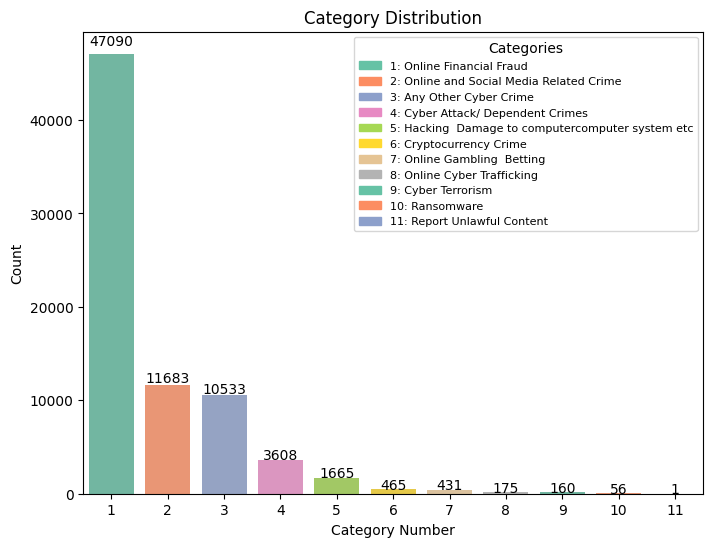

In [158]:
import matplotlib.patches as mpatches

# Prepare the df with counts of each category
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Assign numerical values for each category for x-axis
category_counts['category_num'] = range(1, len(category_counts) + 1)

# Create a color palette with distinct colors for each category
palette = sns.color_palette('Set2', n_colors=len(category_counts))

# Create the bar plot with numeric x-axis and disable the built-in legend
plt.figure(figsize=(8, 6))
sns.barplot(x='category_num', y='count', data=category_counts, hue='category_num', palette=palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Category Number')
plt.ylabel('Count')
plt.title('Category Distribution')

# Display the count on top of the bars
for index, row in category_counts.iterrows():
    plt.text(row.name, row['count'] +(0.02 *row['count']), row['count'], color='black', ha="center")

# Manually create a legend to map numbers to category names
legend_patches = [mpatches.Patch(color=palette[i], label=f"{category_counts['category_num'][i]}: {category_counts['category'][i]}") 
                  for i in range(len(category_counts))]
plt.legend(handles=legend_patches, title='Categories', prop={'size': 8})

# Show the plot
plt.show()

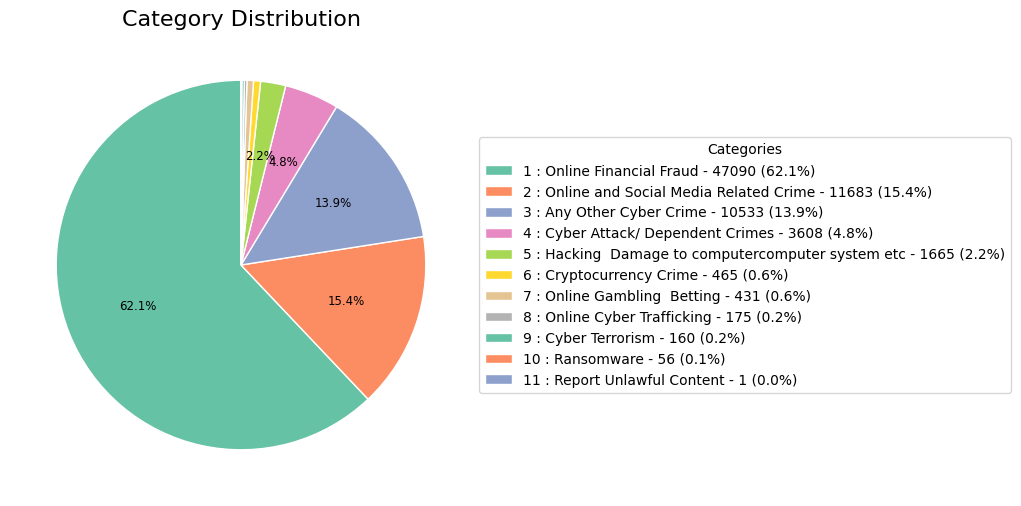

In [159]:
# Define a function to conditionally show percentages only for large slices
def autopct_function(pct):
        return ('%1.1f%%' % pct) if pct > 1.9 else ''  # Show percentage only if slice is larger than 5%

# Create the pie chart with conditional percentage labels
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(category_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 8.5},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Category Distribution', fontsize=16)

# Add a legend with the category labels and their percentages
legend_labels = [f'{category_counts["category_num"][i]} : {category_counts['category'][i]} - {category_counts["count"][i]} ({(category_counts["count"][i] / category_counts["count"].sum()) * 100:.1f}%)' for i in range(len(category_counts))]

plt.legend(wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

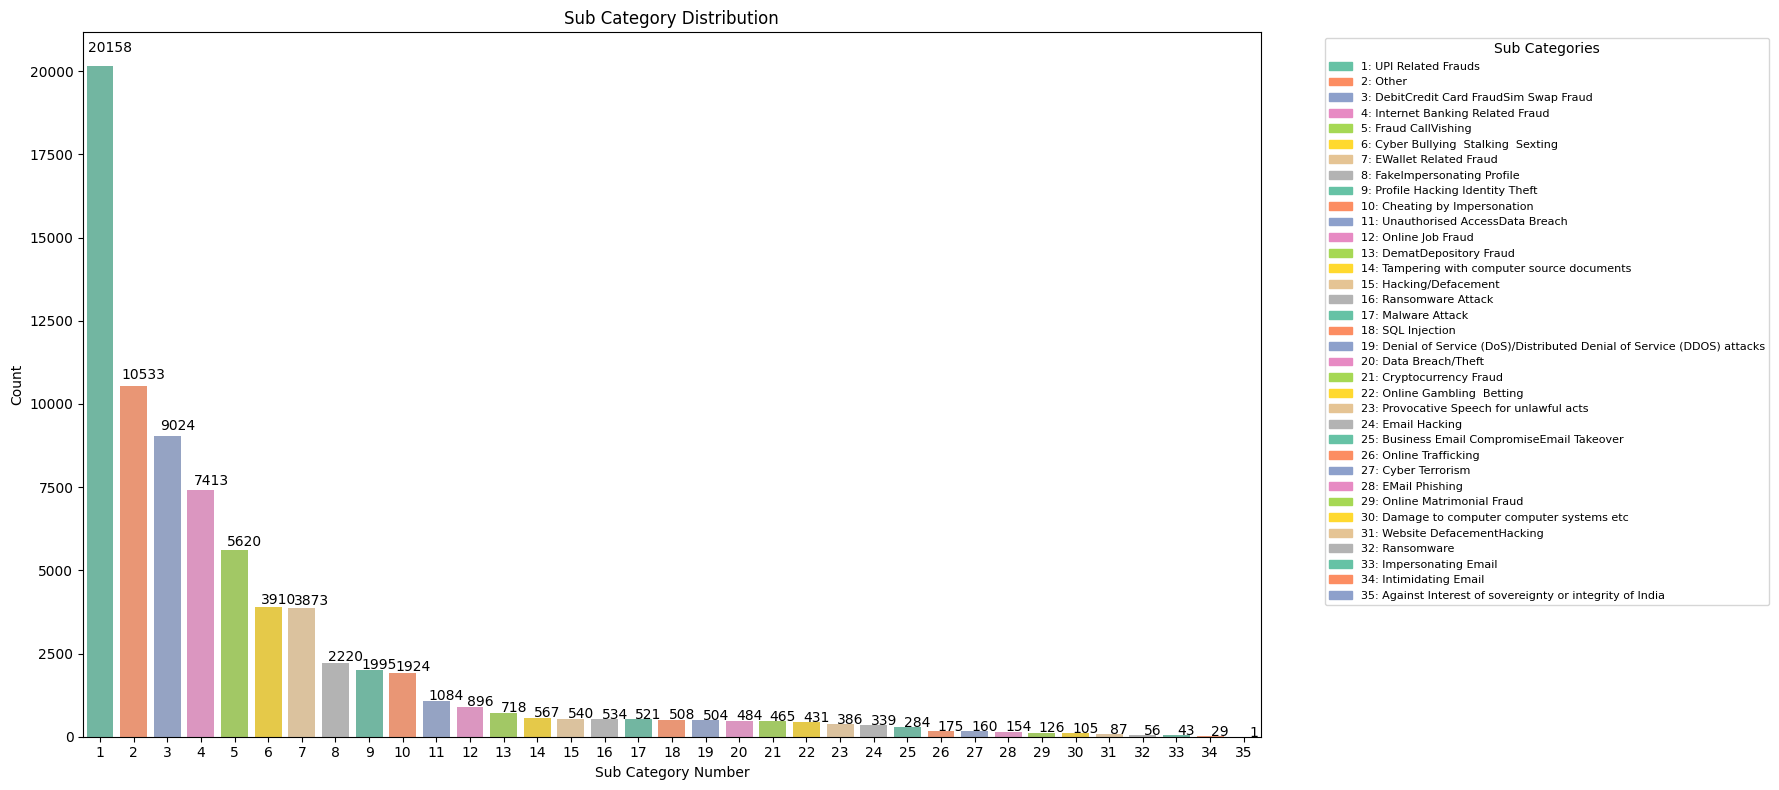

In [160]:
# Prepare the df with counts of each sub-category
sub_category_counts = df['sub_category'].value_counts().reset_index()
sub_category_counts.columns = ['sub_category', 'count']

# Assign numerical values for each sub-category for x-axis
sub_category_counts['sub_category_num'] = range(1, len(sub_category_counts) + 1)

# Create a color palette with distinct colors for each sub-category
sub_palette = sns.color_palette('Set2', n_colors=len(sub_category_counts))

# Create the bar plot with numeric x-axis
plt.figure(figsize=(18, 8))
sns.barplot(x='sub_category_num', y='count', data=sub_category_counts,hue='sub_category_num', palette=sub_palette, dodge=False, legend=False)

# Add labels and title
plt.xlabel('Sub Category Number')
plt.ylabel('Count')
plt.title('Sub Category Distribution')

# Display the count on top of the bars
for index, row in sub_category_counts.iterrows():
    plt.text(row['sub_category_num'] - 0.7, row['count'] + (0.02 * row['count']), row['count'], color='black', ha="center")

# Manually create a legend to map numbers to sub-category names
sub_legend_patches = [mpatches.Patch(color=sub_palette[i], label=f"{sub_category_counts['sub_category_num'][i]}: {sub_category_counts['sub_category'][i]}") 
                  for i in range(len(sub_category_counts))]

# Add legend outside the plot area
plt.legend(handles=sub_legend_patches, title='Sub Categories', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

Pie Chart for Sub Category Distribution

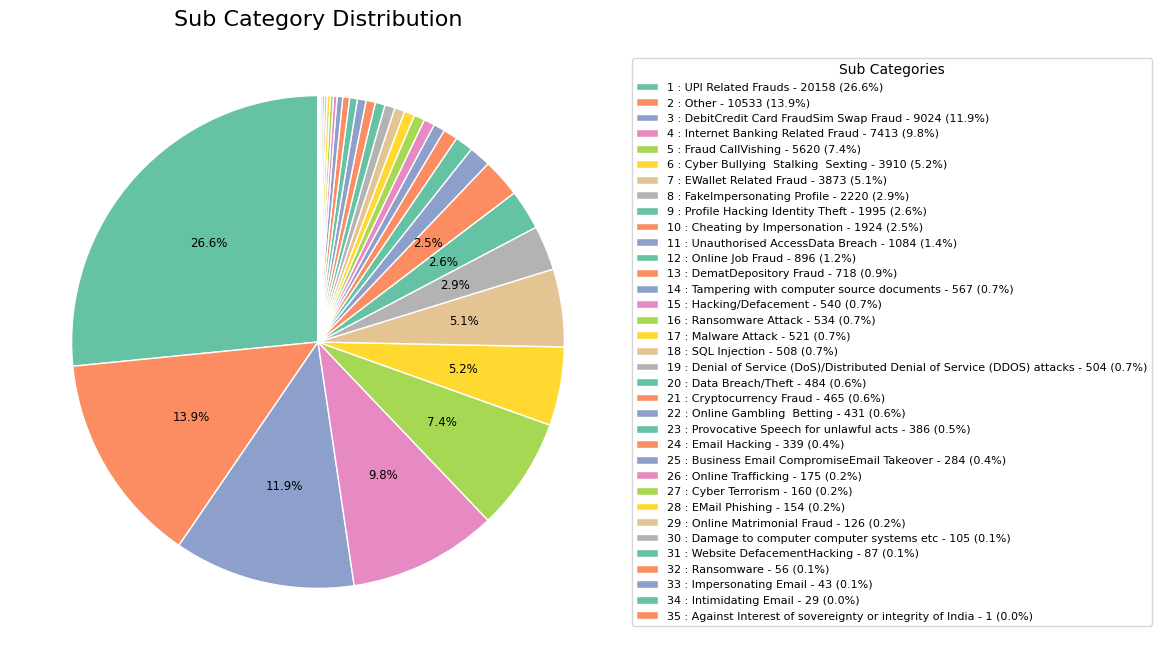

In [161]:
# Define a function to conditionally show percentages only for large slices
def autopct_function(pct):
        return ('%1.1f%%' % pct) if pct > 1.9 else ''  # Show percentage only if slice is larger than 5%

# Create the pie chart with conditional percentage labels
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sub_category_counts['count'],
                                   autopct=autopct_function,
                                   startangle=90,
                                   colors=palette,
                                   textprops={'fontsize': 8.5},
                                   wedgeprops={'linewidth': 1, 'edgecolor': 'white'})  # Add space between slices

# Equal aspect ratio ensures that the pie chart is a circle
plt.gca().set_aspect('equal')

# Add a title
plt.title('Sub Category Distribution', fontsize=16)

# Add a legend with the category labels and their percentages
sub_legend_labels = [f'{sub_category_counts["sub_category_num"][i]} : {sub_category_counts['sub_category'][i]} - {sub_category_counts["count"][i]} ({(sub_category_counts["count"][i] / sub_category_counts["count"].sum()) * 100:.1f}%)' for i in range(len(sub_category_counts))]

plt.legend(wedges, sub_legend_labels, title="Sub Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), prop={'size':8})

# Show the plot
plt.show()

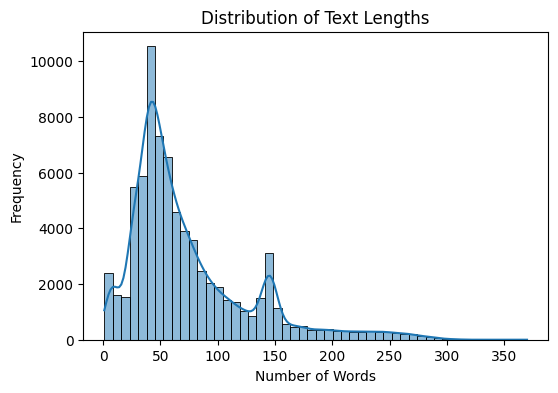

In [162]:
# Calculate the length of text descriptions
df['text_length'] = df['crimeaditionalinfo'].apply(lambda x: len(x.split()))

# Plot the distribution of text length
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Word Cloud for Category**

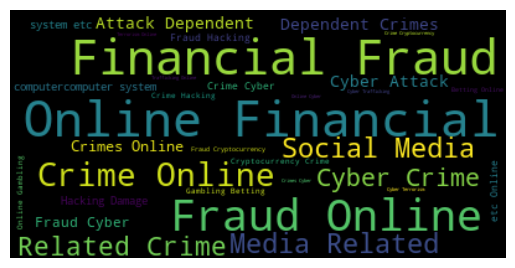

In [163]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df['category']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**N-grams Analysis**

Unigrams, Bigrams, Trigrams:

Analyze n-grams (sequences of 1, 2, or 3 words) to understand common phrases used in the crime descriptions.

Bigrams and trigrams often provide richer context than single-word frequencies.

In [164]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Generate bigrams
# vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
# bigrams = vectorizer.fit_transform(df['crimeaditionalinfo'])
# bigram_freq = pd.DataFrame(bigrams.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# print(bigram_freq.head(10))

**Correlation Between Text Features and Target Variables**

TF-IDF and Category Correlation:

Use Term Frequency-Inverse Document Frequency (TF-IDF) to analyze the importance of words in different categories.

Chi-Square Test:

Perform a chi-square test to check if certain words are significantly associated with a particular category.

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

# Apply TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(df['crimeaditionalinfo'])

# Perform chi-square test
chi2_scores, p_values = chi2(X_tfidf, df['category'])
print("Chi-square scores:", chi2_scores[:10])


Chi-square scores: [12.85230966  0.21318591  0.24184529  0.2323104   0.24690338  0.46147702
  0.36209161  0.32295807  0.20657772  0.08345059]


In [166]:
# Create a DataFrame to hold scores and features
feature_scores = pd.DataFrame({'feature': tfidf.get_feature_names_out(), 'chi2_score': chi2_scores})

# Sort the DataFrame by chi-square score
feature_scores = feature_scores.sort_values(by='chi2_score', ascending=False)

# Display the top 10 features
print(feature_scores.head(10))


       feature   chi2_score
32720      fix  9710.144143
5744   anymore  9492.435914
90927   stange  8921.304741
55822     like  8118.279830
27744      don  8117.056482
47014      isn  7905.757666
5853     apart  7764.962984
32166     fell  7662.623160
47432     iyer  7610.316216
56570   locked  7499.776054


**Pending: How to correct the spellings?**

In [172]:
# from spellchecker import SpellChecker

# spell = SpellChecker()

# def correct_spelling(text):
#     corrected = ' '.join([spell.candidates(word).pop() if word in spell else word for word in text.split()])
#     return corrected

# df['text_description'] = df['text_description'].apply(correct_spelling)

In [173]:
# from spellchecker import SpellChecker
# spell = SpellChecker()
# def correct_spelling(text):
#     words = text.split()
#     corrections = []

#     # Iterate over words and check for spelling
#     for word in words:
#         # Get the corrected word if it's misspelled
#         if word in spell:
#             corrected_word = word  # No correction needed
#         else:
#             corrected_word = spell.candidates(word).pop()  # Get the first candidate
#             corrections.append((word, corrected_word))  # Store the original and corrected word

#         # Replace the word in the original text
#         text = text.replace(word, corrected_word)

#     # Print the corrections
#     for original, corrected in corrections:
#         print(f"Current word: '{original}' -> Corrected word: '{corrected}'")
    
#     return text

# # Apply the correction function
# df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(correct_spelling)

# # Display the updated DataFrame
# print(df)

In [174]:
 #This spell checking is not working properly
# from textblob import TextBlob
# def correct_spelling_and_track(text):
#     # Create a TextBlob object
#     blob = TextBlob(text)

#     # Store original and corrected words
#     corrections = {}

#     # Correct the text and track corrections
#     for word in blob.words:
#         corrected_word = str(TextBlob(word).correct())
#         if word != corrected_word:
#             print(f"word:{word} and corrected :{corrected_word}")
#             corrections[word] = corrected_word

#     corrected_text = str(blob.correct())
#     return corrected_text, corrections

# # Apply the correction function
# df[['corrected_text', 'corrections']] = df['crimeaditionalinfo'].apply(lambda x: pd.Series(correct_spelling_and_track(x)))

# # Display the DataFrame
# print(df)

**Pending: How to handle different languages?**

In [175]:
# from collections import Counter
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')

# # Tokenize and count word frequencies for each category
# def get_word_frequencies(text_list):
#     words = word_tokenize(' '.join(text_list))
#     return Counter(words)

# category_word_freq = df.groupby('category')['crimeaditionalinfo'].apply(get_word_frequencies)

# print(category_word_freq)

# Pending list

**1. How to correct the spellings?**

**2.How to handle different languages?**

**3. How to handle class imbalance? Can we use class weighting?** 

**4. Stop words removal, tokenization, lemmatization/Stemming**

**5. Extract embeddings: Use SBERT (Check with both pretrained and finetuned)**

**6. Check for any other domain adapted SBERT or other BERT based models**

**7. We can also condense the text to key words like subjects, verbs and objects using SpaCy and get the embeddings**

**8. Model Design**

**8.1 : We can use Multi Task Learning Model**

In this approach, you treat category and subcategory as two separate, but related tasks and design a multi-output model that predicts both simultaneously. 

This allows the model to share knowledge between tasks.

Input: Text descriptions.

Output: Two predictions — one for the main category and another for subcategory.

**Model Architecture:**

Shared Layer: A shared layer that processes the text and extracts useful features.

Task-Specific Layers: Separate layers for category and subcategory classification.

Category Classifier: Predicts the higher-level category.

Subcategory Classifier: Predicts the more detailed subcategory.


# Implementing MTL with a Neural Network

In [176]:
#Implementing MTL with a Neural Network
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Define input
input_layer = Input(shape=(X.shape[1],))

# Shared layers
shared = Dense(128, activation='relu')(input_layer)
shared = Dropout(0.5)(shared)

# Output layers (for Category and Subcategory)
category_output = Dense(num_category_classes, activation='softmax', name='category')(shared)
subcategory_output = Dense(num_subcategory_classes, activation='softmax', name='subcategory')(shared)

# Define the model with multi-output
model = Model(inputs=input_layer, outputs=[category_output, subcategory_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'category': 'categorical_crossentropy', 'subcategory': 'categorical_crossentropy'},
              metrics={'category': 'accuracy', 'subcategory': 'accuracy'})

# Train the model
model.fit(X_train, {'category': y_category_train, 'subcategory': y_subcategory_train}, epochs=10, batch_size=32)


In [ ]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate category predictions
category_preds = model.predict(X_test)
print(classification_report(y_category_test, category_preds))

# Evaluate subcategory predictions
subcategory_preds = subcategory_model.predict(X_test)
print(classification_report(y_subcategory_test, subcategory_preds))

# Confusion matrix for category predictions
confusion_matrix(y_category_test, category_preds)

# Advanced Approach: Transfer Learning with BERT and Multi-Task Learning

Steps:

Use a pre-trained BERT model to get deep contextual embeddings for the text.

Fine-tune BERT with a multi-task learning objective, where one task is predicting the category and the other is predicting the subcategory.

Optionally, you can apply hierarchical classification where the category prediction informs the subcategory prediction.

In [177]:
#Data Preprocessing
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode the data
def encode_texts(texts, max_len=128):
    return tokenizer.batch_encode_plus(
        texts, 
        max_length=max_len, 
        padding='max_length', 
        truncation=True, 
        return_tensors='tf'
    )

# Example: Encode training and validation text descriptions
X_train_encoded = encode_texts(X_train['text_description'])
X_val_encoded = encode_texts(X_val['text_description'])

# Convert labels to one-hot encoding for category and subcategory
y_train_category = tf.keras.utils.to_categorical(y_train['category'], num_classes=num_category_classes)
y_train_subcategory = tf.keras.utils.to_categorical(y_train['subcategory'], num_classes=num_subcategory_classes)

y_val_category = tf.keras.utils.to_categorical(y_val['category'], num_classes=num_category_classes)
y_val_subcategory = tf.keras.utils.to_categorical(y_val['subcategory'], num_classes=num_subcategory_classes)


**Building a Multi-Task BERT Model**
We will create a model that shares a BERT layer and has two task-specific heads: one for predicting the category and another for the subcategory.

Model Architecture:

BERT Layer: For extracting contextual embeddings.

Shared Dense Layer: A shared dense layer to extract common features from the BERT embeddings.

Task-Specific Output Layers: Two separate output layers — one for predicting the category and the other for subcategory.

In [ ]:
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define input layers
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Get BERT embeddings
bert_output = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = bert_output.pooler_output  # CLS token representation

# Shared Dense layer
shared_dense = Dense(128, activation='relu')(pooled_output)
shared_dropout = Dropout(0.3)(shared_dense)

# Category output
category_output = Dense(num_category_classes, activation='softmax', name='category_output')(shared_dropout)

# Subcategory output
subcategory_output = Dense(num_subcategory_classes, activation='softmax', name='subcategory_output')(shared_dropout)

# Define the multi-task model
model = Model(inputs=[input_ids, attention_mask], outputs=[category_output, subcategory_output])

# Compile the model with two different losses (one for each task)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss={'category_output': 'categorical_crossentropy', 'subcategory_output': 'categorical_crossentropy'},
              metrics={'category_output': 'accuracy', 'subcategory_output': 'accuracy'})

# Display the model architecture
model.summary()


**Model Training**

We'll train the model on both the category and subcategory labels simultaneously

In [ ]:
# Training the multi-task BERT model

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['attention_mask']],
    {'category_output': y_train_category, 'subcategory_output': y_train_subcategory},
    validation_data=([X_val_encoded['input_ids'], X_val_encoded['attention_mask']],
                     {'category_output': y_val_category, 'subcategory_output': y_val_subcategory}),
    epochs=3,
    batch_size=16
    callbacks=[early_stopping]
)

**Model Evaluation**

Evaluate the performance on the validation set using the category and subcategory outputs.

In [ ]:
# Predict category and subcategory
category_preds, subcategory_preds = model.predict([X_val_encoded['input_ids'], X_val_encoded['attention_mask']])

# Convert predictions to labels
category_preds = category_preds.argmax(axis=-1)
subcategory_preds = subcategory_preds.argmax(axis=-1)

# Evaluate the accuracy and other metrics
from sklearn.metrics import classification_report

print("Category Classification Report")
print(classification_report(y_val['category'], category_preds))

print("Subcategory Classification Report")
print(classification_report(y_val['subcategory'], subcategory_preds))

# Additionally, we can use ensemble methods also.

Using ensemble models can significantly improve classification performance by combining the strengths of multiple models. 

For your multilevel-multiclass classification (predicting both category and subcategory), we'll integrate a BERT model with traditional models like Random Forest or XGBoost to create an ensemble.

The ensemble can be created through techniques like stacking, where:

BERT will provide contextually rich embeddings of the text data.

Traditional models (e.g., XGBoost, Random Forest) will be trained on features like TF-IDF representations of the text.

The predictions from all models can be combined using a meta-model (like logistic regression) that will learn how to combine these outputs for the best final prediction.

**Ensemble Learning Approach**

Generate Text Embeddings: Use BERT to generate embeddings for the input text.
    
Extract TF-IDF Features: Create traditional features using TF-IDF from the text.

Train Models: Train separate models on each of these feature sets (BERT embeddings and TF-IDF features).

Combine Predictions (Stacking): Combine predictions from multiple models using a meta-model to predict both the category and subcategory.

In [ ]:
# Generate BERT Embeddings:
from transformers import BertTokenizer, TFBertModel
import numpy as np

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Function to generate BERT embeddings
def generate_bert_embeddings(texts, max_len=128):
    inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True, max_length=max_len)
    outputs = bert_model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    return outputs.last_hidden_state[:, 0, :].numpy()  # Use the [CLS] token's embedding (first token)

# Example: Generate BERT embeddings for training and validation text
bert_train_embeddings = generate_bert_embeddings(X_train['text_description'])
bert_val_embeddings = generate_bert_embeddings(X_val['text_description'])


In [ ]:
# TF-IDF Features
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit and transform the training text
tfidf_train = tfidf_vectorizer.fit_transform(X_train['text_description']).toarray()
tfidf_val = tfidf_vectorizer.transform(X_val['text_description']).toarray()

In [ ]:
#  Train XGBoost on TF-IDF features
import xgboost as xgb

# Define XGBoost model for category classification
xgb_category = xgb.XGBClassifier(objective='multi:softmax', num_class=num_category_classes)

# Train the XGBoost model on TF-IDF features
xgb_category.fit(tfidf_train, y_train['category'])

# Predict category on validation data
xgb_category_preds = xgb_category.predict(tfidf_val)

In [ ]:
# Train Neural Network on BERT Embeddings
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

# Define a neural network for category classification on BERT embeddings
nn_category = Sequential([
    Dense(256, activation='relu', input_shape=(bert_train_embeddings.shape[1],)),
    Dropout(0.3),
    Dense(num_category_classes, activation='softmax')
])

# Compile the model
nn_category.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on BERT embeddings
nn_category.fit(bert_train_embeddings, y_train_category, epochs=3, batch_size=32, validation_data=(bert_val_embeddings, y_val_category))

# Predict category on validation data
nn_category_preds = nn_category.predict(bert_val_embeddings).argmax(axis=-1)

After training the models, we combine their predictions using a meta-model like logistic regression or another neural network. 

First, we need to create a dataset of predictions from our base models.

In [ ]:
# Stacking Ensemble
from sklearn.linear_model import LogisticRegression

# Stack the predictions from both models as inputs for a meta-model
stacked_train = np.column_stack((xgb_category.predict(tfidf_train), nn_category.predict(bert_train_embeddings).argmax(axis=-1)))
stacked_val = np.column_stack((xgb_category_preds, nn_category_preds))

# Define and train a logistic regression meta-model on the stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train['category'])

# Predict the final category using the meta-model
final_category_preds = meta_model.predict(stacked_val)


In [ ]:
# Evaluation

from sklearn.metrics import classification_report

# Print classification report for final category predictions
print("Category Classification Report")
print(classification_report(y_val['category'], final_category_preds))

# (Similarly, you can evaluate subcategory predictions)

# You can Use LSTM instead of Feed Forward Neural Network

In [178]:
# LSTM on BERT Embeddings
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define an LSTM model for category classification using BERT embeddings
lstm_category = Sequential([
    LSTM(128, return_sequences=False, input_shape=(bert_train_embeddings.shape[1], 1)),  # LSTM layer
    Dropout(0.3),
    Dense(num_category_classes, activation='softmax')  # Output layer with softmax activation
])

# Reshape BERT embeddings for LSTM input (requires 3D input: [samples, timesteps, features])
bert_train_reshaped = bert_train_embeddings.reshape((bert_train_embeddings.shape[0], bert_train_embeddings.shape[1], 1))
bert_val_reshaped = bert_val_embeddings.reshape((bert_val_embeddings.shape[0], bert_val_embeddings.shape[1], 1))

# Compile the LSTM model
lstm_category.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model on BERT embeddings
lstm_category.fit(bert_train_reshaped, y_train_category, epochs=3, batch_size=32, validation_data=(bert_val_reshaped, y_val_category))

# Predict category on validation data
lstm_category_preds = lstm_category.predict(bert_val_reshaped).argmax(axis=-1)

In [ ]:
# Stacking Ensemble using LSTM
# Stack the predictions from both models (e.g., XGBoost and LSTM)
stacked_train = np.column_stack((xgb_category.predict(tfidf_train), lstm_category.predict(bert_train_reshaped).argmax(axis=-1)))
stacked_val = np.column_stack((xgb_category_preds, lstm_category_preds))

# Train a meta-model on the stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_train, y_train['category'])

# Predict the final category using the meta-model
final_category_preds = meta_model.predict(stacked_val)

# Evaluate the ensemble
print("Category Classification Report")
print(classification_report(y_val['category'], final_category_preds))

### Conclusion

After the analysis on the 'category' feature, we can conclude that:
- The dataset is imbalanced.
- The distribution of the category is not uniform.
- The category 'Online Financial Fraud' has the highest frequency.
- Total number of categories are 15.